This notebook contains exercises to help students transition from excel to python.
For personal practice, I converted pieces of the code into functions, but "repeated"
myself because some sections contain arguments I did not make dynamic in the initial function.
Perhaps after the bootcamp pilot I will revisit the project and develop a custom package to repeat the analysis for other teams.

# loading in the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../mats/2023-nwbc-reds.csv')

# Checking data characteristics

In [4]:
df.shape

(49038, 95)

In [5]:
sorted(df.columns)

['at_bat_number',
 'attack_zone',
 'away_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'babip_value',
 'balls',
 'bat_score',
 'batter',
 'batter_name',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'delta_home_win_exp',
 'delta_run_exp',
 'des',
 'description',
 'effective_speed',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'fielder_2',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'fld_score',
 'game_date',
 'game_pk',
 'game_type',
 'game_year',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'home_score',
 'home_team',
 'if_fielding_alignment',
 'inning',
 'inning_topbot',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'of_fielding_alignment',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_name',
 'pitch_number',
 'pitch_type',
 'pitcher',
 'pitcher.1',
 'pitcher_name',
 'plate_x',
 '

In [6]:
df.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,swing
count,48004.000000,48005.000000,48005.000000,49038.000000,49038.000000,0.0,0.0,0.0,0.0,48005.000000,...,49038.000000,49038.000000,49038.000000,49038.000000,49038.000000,49038.000000,47245.000000,49038.000000,47990.000000,49038.0
mean,89.489322,-0.937300,5.771255,603472.688201,617183.213487,NaN,NaN,NaN,NaN,9.072451,...,2.220604,2.222827,2.222950,2.251988,2.252111,2.222827,175.738724,0.000098,0.002370,0.0
std,6.011860,1.871269,0.470030,67092.014911,61535.933227,NaN,NaN,NaN,NaN,4.227762,...,2.540002,2.611473,2.539729,2.626396,2.555069,2.611473,72.048866,0.027262,0.242729,0.0
min,39.100000,-4.620000,1.140000,405395.000000,424144.000000,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.697000,-1.110000,0.0
25%,85.100000,-2.220000,5.530000,571657.000000,592716.000000,NaN,NaN,NaN,NaN,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,0.000000,-0.066000,0.0
50%,90.300000,-1.570000,5.820000,608703.000000,641816.000000,NaN,NaN,NaN,NaN,11.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,204.000000,0.000000,-0.017000,0.0
75%,94.300000,-0.630000,6.050000,663697.000000,665665.000000,NaN,NaN,NaN,NaN,13.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,224.000000,0.000000,0.033000,0.0
max,103.400000,4.460000,7.530000,703715.000000,699479.000000,NaN,NaN,NaN,NaN,14.000000,...,20.000000,20.000000,15.000000,20.000000,20.000000,20.000000,360.000000,0.858000,3.354000,0.0


In [7]:
df['total_score'] = df['home_score'] + df['away_score']
df.head(1)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,15,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17


In [8]:
df['description'].unique()

array(['hit_into_play', 'ball', 'called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip',
       'pitchout'], dtype=object)

# Feature engineering
creating new columns

In [9]:
strike_events = ['called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip']

In [10]:
df['is_strike'] = 0
df.loc[df['description'].isin(strike_events), 'is_strike'] = 1

In [11]:
df['is_strike'].value_counts()

0    24800
1    24238
Name: is_strike, dtype: int64

In [12]:
df['is_2_strikes'] = 0
df.loc[df['strikes'] == 2, 'is_2_strikes'] = 1

In [13]:
df['is_high_velo'] = 0
df.loc[df['release_speed'] > 94, 'is_high_velo'] = 1

In [14]:
strike_list =  ['called_strike', 'swinging_strike']
df['strike_heart'] = 0
df.loc[(df['description'].isin(strike_list)) & (df['attack_zone'] == 'heart'), 'strike_heart'] = 1
df.iloc[:, -4:].head(5)

,is_strike,is_2_strikes,is_high_velo,strike_heart
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,1
4,1,0,1,1


In [15]:
#converted original to a function, so we can get info on other teams if needed
def team_find(df, team):
    _df = df
    _df[f'is_{team}_pitcher'] = 0
    _df.loc[((_df['home_team'] == f'{team}')
        & (_df['inning_topbot'] == 'Top')) 
        | ((_df['away_team'] == f'{team}') 
        & (_df['inning_topbot'] == 'Bot'))
        , f'is_{team}_pitcher'] = 1
    # df_1 = _df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).mean()
    # df_2= _df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).count()
    # df_1 = df_1.rename(columns = {'is_strike':'avg'})
    # df_2 = df_2.rename(columns = {'is_strike':'count'})
    # df_3 = df_1.merge(df_2, on=['pitcher_name','pitch_name'])
    
    return _df

In [16]:
def pitch_find(df,team):
    df_1 = df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).mean()
    df_2= df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).count()
    df_1 = df_1.rename(columns = {'is_strike':'avg'})
    df_2 = df_2.rename(columns = {'is_strike':'count'})
    return df_1.merge(df_2, on=['pitcher_name','pitch_name'])

In [17]:
#need to add f strings to set axis
def visualize_df(df,num):
    players= list(df['pitcher_name'].unique())
    for name in players[:num]:
        plt.title(f'{name}')
        df_plt = df.loc[df['pitcher_name'] ==name]
        sns.barplot(data=df_plt, x='avg',y='pitch_name')
        plt.show()

# Team pitcher data frame

In [18]:
list(df['home_team'].unique())[:3]

['CIN', 'CHC', 'PIT']

In [19]:
CIN_df = team_find(df, 'CIN')

In [20]:
CIN_df[['home_team','away_team']].value_counts()

home_team  away_team
CIN        CHC          3086
           MIL          3076
STL        CIN          2929
PIT        CIN          2895
MIL        CIN          2813
CIN        STL          2754
CHC        CIN          2718
CIN        PIT          2681
AZ         CIN          1233
CIN        WSH          1196
LAD        CIN          1176
ATL        CIN          1175
CIN        AZ           1175
           MIA          1116
           SD           1102
PHI        CIN          1072
CIN        TB           1025
NYY        CIN           996
CIN        LAD           923
           NYM           923
           COL           876
           BAL           875
           SF            871
           ATL           869
WSH        CIN           850
NYM        CIN           845
SF         CIN           837
COL        CIN           829
CIN        PHI           826
SD         CIN           800
MIA        CIN           765
TOR        CIN           749
CIN        CLE           672
CLE        CIN        

In [21]:
CIN_pitcher = pitch_find(CIN_df, 'CIN')

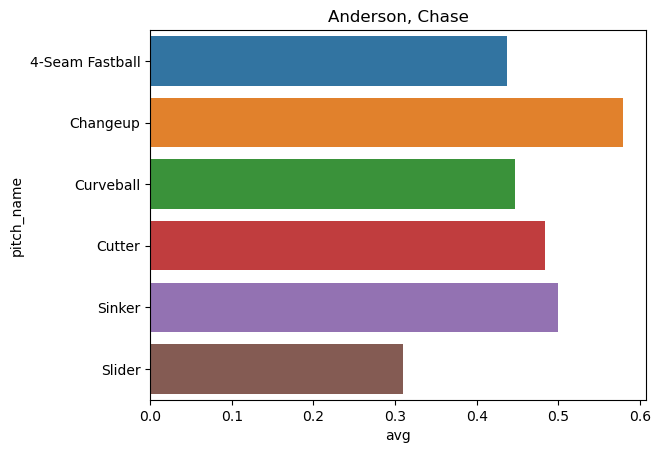

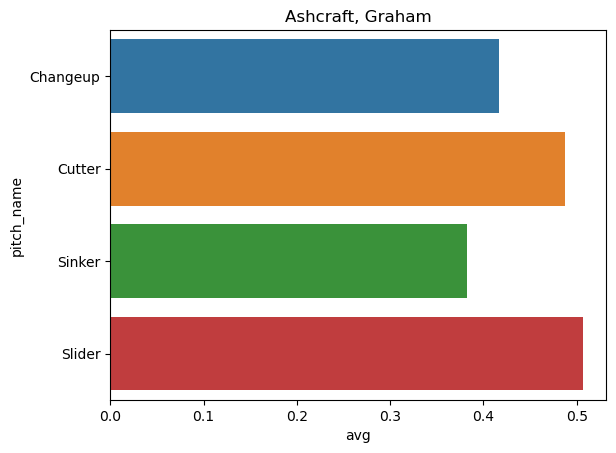

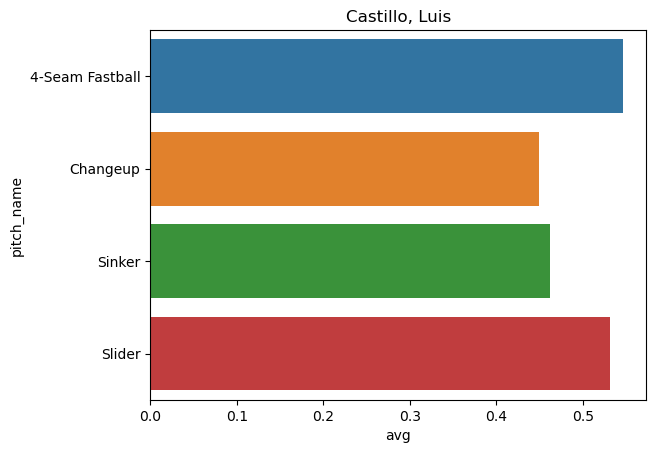

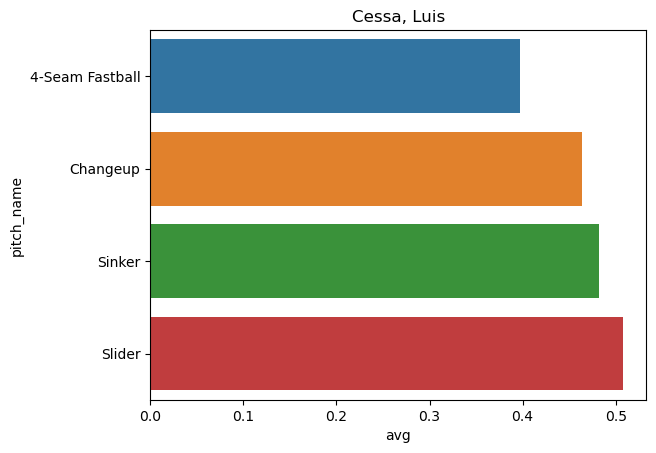

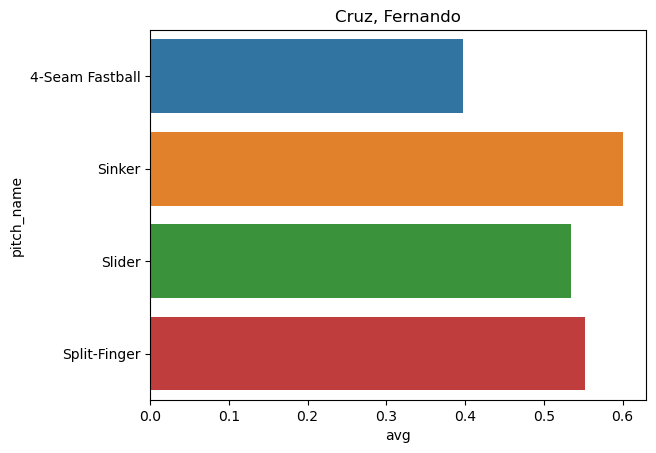

In [22]:
visualize_df(CIN_pitcher,5)

In [23]:
#attack zone
df_attack = (CIN_df.loc[:, ['attack_zone','is_strike']].groupby(['attack_zone'], as_index=False).mean())
df_attack

,attack_zone,is_strike
0,chase,0.248736
1,heart,0.677623
2,shadow,0.565635
3,waste,0.289532


In [24]:
df_pitcher_attack= CIN_df.loc[(CIN_df['is_CIN_pitcher']==1)&(CIN_df['release_speed'].between(80,90)), ['pitcher_name', 'attack_zone','is_strike']].groupby(['pitcher_name','attack_zone'], as_index=False).agg(avg=('is_strike','mean'),count = ('is_strike','count')).reset_index()
df_pitcher_attack

,index,pitcher_name,attack_zone,avg,count
0,0,"Anderson, Chase",chase,0.271429,70
1,1,"Anderson, Chase",heart,0.809524,42
2,2,"Anderson, Chase",shadow,0.584071,113
3,3,"Anderson, Chase",waste,0.187500,16
4,4,"Ashcraft, Graham",chase,0.406250,128
...,...,...,...,...,...
142,142,"Zeuch, T.J.",heart,0.666667,30
143,143,"Zeuch, T.J.",shadow,0.408163,49
144,144,"Zeuch, T.J.",waste,0.200000,15
145,145,"Zimmer, Kyle",chase,1.000000,2


In [25]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike,is_2_strikes,is_high_velo,strike_heart,is_CIN_pitcher
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,-0.083,heart,0,"garcia, aramis",17,0,1,0,0,0
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,0.014,shadow,0,"garcia, aramis",17,0,1,0,0,0
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,0.011,waste,0,"garcia, aramis",17,0,1,0,0,0
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,-0.023,heart,0,"garcia, aramis",17,1,0,0,1,0
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,-0.017,heart,0,"garcia, aramis",17,1,0,1,1,0


# Batter and pitcher analysis

In [26]:
#The purpose of this code is to identify how many pitch types resulted in a homerune based on a pitch type (name).
df_batter_hr = df
df_batter_hr['is_hr'] = 0
df_batter_hr.loc[df_batter_hr['events']=='home_run', 'is_hr'] =1
df_batter_hr = df_batter_hr.loc[df_batter_hr['is_hr']==1, ['batter_name', 'pitch_name', 'is_hr']].groupby(['batter_name','pitch_name'], as_index=False).sum()
df_batter_hr.rename(columns={'is_hr':'hr_count'}, inplace=True)
df_batter_hr

,batter_name,pitch_name,hr_count
0,"adames, willy",4-Seam Fastball,1
1,"adames, willy",Curveball,1
2,"adames, willy",Cutter,2
3,"adames, willy",Slider,4
4,"aguilar, jesús",Cutter,1
...,...,...,...
254,"wong, kolten",4-Seam Fastball,3
255,"wong, kolten",Slider,1
256,"yastrzemski, mike",4-Seam Fastball,1
257,"yelich, christian",4-Seam Fastball,2


In [27]:
df_pitch_hr = df.loc[:, ['pitcher_name','pitch_name','is_hr']].groupby(['pitcher_name','pitch_name'], as_index=False).count()
_df_pitch_hr = df_pitch_hr.loc[:,['pitcher_name','is_hr']].groupby(['pitcher_name'], as_index=False).max()
df_pitch_hr=df_pitch_hr.merge(_df_pitch_hr)
df_pitch_hr.rename(columns={'is_hr':'pitch_count'}, inplace=True)


In [28]:
df_pitch_type = df_batter_hr.merge(df_pitch_hr, on='pitch_name')

In [29]:
df_pitch_type.shape

(20301, 5)

In [30]:
df_pitch_type.head(10)

,batter_name,pitch_name,hr_count,pitcher_name,pitch_count
0,"adames, willy",4-Seam Fastball,1,"Adon, Joan",73
1,"adames, willy",4-Seam Fastball,1,"Anderson, Ian",30
2,"adames, willy",4-Seam Fastball,1,"Anderson, Tyler",47
3,"adames, willy",4-Seam Fastball,1,"Baker, Bryan",11
4,"adames, willy",4-Seam Fastball,1,"Bautista, Félix",13
5,"adames, willy",4-Seam Fastball,1,"Bazardo, Eduard",4
6,"adames, willy",4-Seam Fastball,1,"Bednar, David",47
7,"adames, willy",4-Seam Fastball,1,"Beeks, Jalen",15
8,"adames, willy",4-Seam Fastball,1,"Bickford, Phil",28
9,"adames, willy",4-Seam Fastball,1,"Bieber, Shane",35


In [31]:
#The purpose of this feature is to identify if a bitcher and patter matched up in a game
df_match_up = df.loc[:, ['batter_name','pitcher_name']].drop_duplicates()
df_match_up['matched_up'] = 1

df_played_stats = df_pitch_type.merge(df_match_up, how="left")
df_played_stats['matched_up']= df_played_stats['matched_up'].fillna(0).astype(int)
df_played_stats.head(35)

,batter_name,pitch_name,hr_count,pitcher_name,pitch_count,matched_up
0,"adames, willy",4-Seam Fastball,1,"Adon, Joan",73,0
1,"adames, willy",4-Seam Fastball,1,"Anderson, Ian",30,0
2,"adames, willy",4-Seam Fastball,1,"Anderson, Tyler",47,0
3,"adames, willy",4-Seam Fastball,1,"Baker, Bryan",11,0
4,"adames, willy",4-Seam Fastball,1,"Bautista, Félix",13,0
5,"adames, willy",4-Seam Fastball,1,"Bazardo, Eduard",4,0
6,"adames, willy",4-Seam Fastball,1,"Bednar, David",47,0
7,"adames, willy",4-Seam Fastball,1,"Beeks, Jalen",15,0
8,"adames, willy",4-Seam Fastball,1,"Bickford, Phil",28,0
9,"adames, willy",4-Seam Fastball,1,"Bieber, Shane",35,0


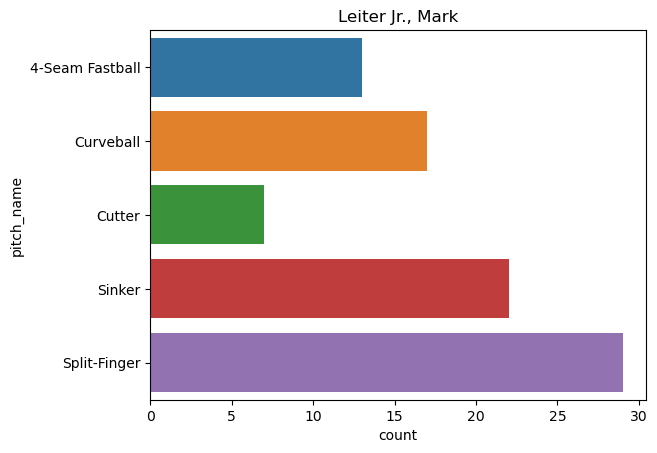

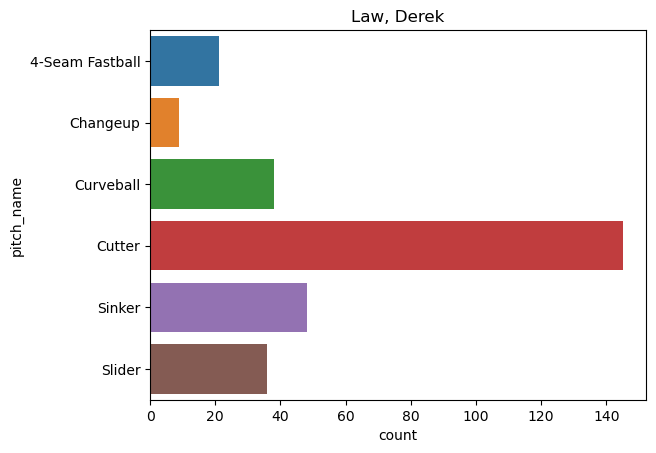

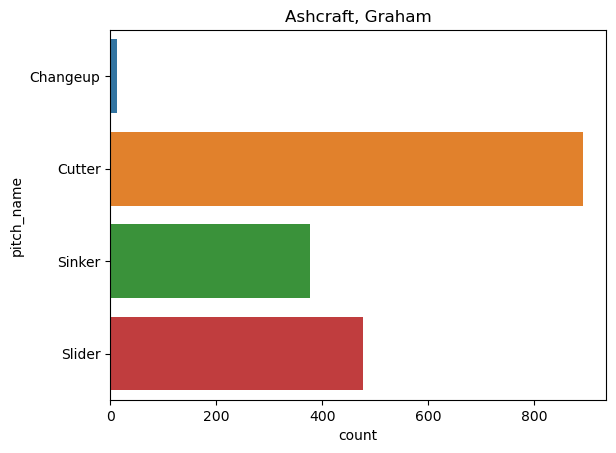

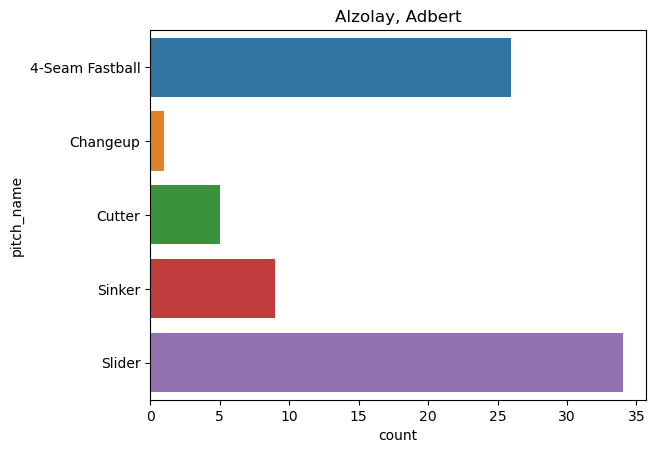

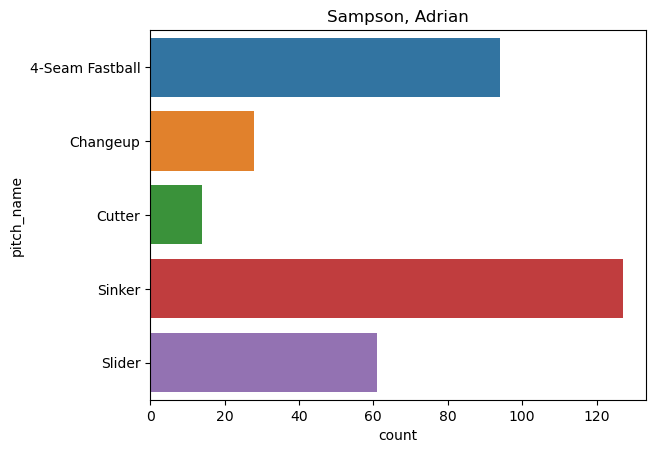

In [32]:
#pitch type by pitcher
pitchers = df['pitcher_name'].unique()[7:12]
plt_df = df.loc[df['pitcher_name'].isin(pitchers), ['pitcher_name','pitch_name','is_strike']].groupby(['pitcher_name','pitch_name'], as_index=False).count()
plt_df.rename(columns={'is_strike':'count'},inplace=True)
for pitcher in pitchers:
    plt.title(f'{pitcher}')
    sns.barplot(data=plt_df.loc[plt_df['pitcher_name']==pitcher], x='count', y='pitch_name')
    plt.show()

<AxesSubplot:xlabel='avg', ylabel='count'>

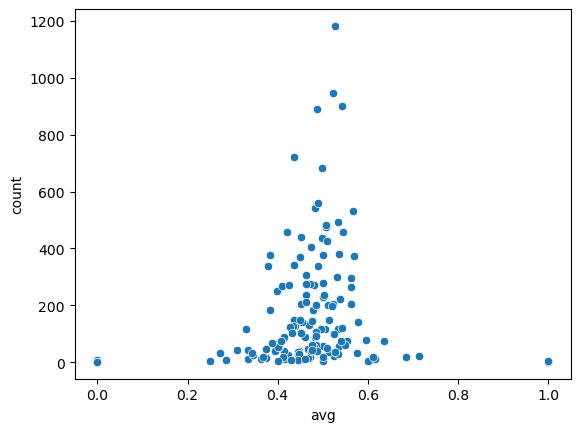

In [33]:
scatter_df = CIN_df.loc[CIN_df['is_CIN_pitcher']==1, ['pitcher_name','pitch_name','is_strike']].groupby(['pitcher_name','pitch_name'], as_index=False).agg(count = ('is_strike','count'),avg=('is_strike','mean')).reset_index()
sns.scatterplot(data=scatter_df, x ='avg', y='count')

In [34]:
sorted(list(df.columns))

['at_bat_number',
 'attack_zone',
 'away_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'babip_value',
 'balls',
 'bat_score',
 'batter',
 'batter_name',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'delta_home_win_exp',
 'delta_run_exp',
 'des',
 'description',
 'effective_speed',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'fielder_2',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'fld_score',
 'game_date',
 'game_pk',
 'game_type',
 'game_year',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'home_score',
 'home_team',
 'if_fielding_alignment',
 'inning',
 'inning_topbot',
 'is_2_strikes',
 'is_CIN_pitcher',
 'is_high_velo',
 'is_hr',
 'is_strike',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'of_fielding_alignment',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_name',
 'pitch_numb